In [2]:
import open3d as o3d
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud("dataset\pointcloud\pointcloud_cameraPos-0_white_1.ply")
print(pcd)
#print(np.asarray(pcd.points))
# o3d.visualization.draw_geometries([pcd],
#                                   zoom=0.3412,
#                                   front=[0.4257, -0.2125, -0.8795],
#                                   lookat=[2.6172, 2.0475, 1.532],
#                                   up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it
[Open3D WARNING] Read PLY failed: unable to open file: dataset\pointcloud\pointcloud_cameraPos-0_white_1.ply
PointCloud with 0 points.


In [5]:
import pyk4a

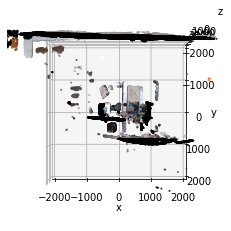

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d  # noqa: F401

import pyk4a
from pyk4a import Config, PyK4A


def main():
    k4a = PyK4A(
        Config(
            color_resolution=pyk4a.ColorResolution.RES_720P,
            camera_fps=pyk4a.FPS.FPS_5,
            depth_mode=pyk4a.DepthMode.WFOV_2X2BINNED,
            synchronized_images_only=True,
        )
    )
    k4a.start()

    # getters and setters directly get and set on device
    k4a.whitebalance = 4500
    assert k4a.whitebalance == 4500
    k4a.whitebalance = 4510
    assert k4a.whitebalance == 4510
    while True:
        capture = k4a.get_capture()
        if np.any(capture.depth) and np.any(capture.color):
            break
    while True:
        capture = k4a.get_capture()
        if np.any(capture.depth) and np.any(capture.color):
            break
    points = capture.depth_point_cloud.reshape((-1, 3))
    colors = capture.transformed_color[..., (2, 1, 0)].reshape((-1, 3))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        points[:, 0],
        points[:, 1],
        points[:, 2],
        s=1,
        c=colors / 255,
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-2000, 2000)
    ax.set_ylim(-2000, 2000)
    ax.set_zlim(0, 4000)
    ax.view_init(elev=-90, azim=-90)
    plt.show()

    k4a.stop()


if __name__ == "__main__":
    main()

In [7]:
import cv2
import numpy as np

import pyk4a
from helpers import colorize
from pyk4a import Config, PyK4A


def main():
    k4a = PyK4A(
        Config(
            color_resolution=pyk4a.ColorResolution.OFF,
            depth_mode=pyk4a.DepthMode.NFOV_UNBINNED,
            synchronized_images_only=False,
        )
    )
    k4a.start()

    # getters and setters directly get and set on device
    k4a.whitebalance = 4500
    assert k4a.whitebalance == 4500
    k4a.whitebalance = 4510
    assert k4a.whitebalance == 4510

    while True:
        capture = k4a.get_capture()
        if np.any(capture.depth):
            cv2.imshow("k4a", colorize(capture.depth, (None, 5000), cv2.COLORMAP_HSV))
            key = cv2.waitKey(10)
            if key != -1:
                cv2.destroyAllWindows()
                break
    k4a.stop()


if __name__ == "__main__":
    main()


######################################

import cv2
import numpy as np

import pyk4a
from pyk4a import Config, PyK4A


def main():
    k4a = PyK4A(
        Config(
            color_resolution=pyk4a.ColorResolution.RES_720P,
            depth_mode=pyk4a.DepthMode.NFOV_UNBINNED,
            synchronized_images_only=True,
        )
    )
    k4a.start()

    # getters and setters directly get and set on device
    k4a.whitebalance = 4500
    assert k4a.whitebalance == 4500
    k4a.whitebalance = 4510
    assert k4a.whitebalance == 4510

    while 1:
        capture = k4a.get_capture()
        if np.any(capture.color):
            cv2.imshow("k4a", capture.color[:, :, :3])
            key = cv2.waitKey(10)
            if key != -1:
                cv2.destroyAllWindows()
                break
    k4a.stop()


if __name__ == "__main__":
    main()

In [9]:
import cv2
import numpy as np

import pyk4a
from pyk4a import Config, PyK4A


def main():
    k4a = PyK4A(
        Config(
            color_resolution=pyk4a.ColorResolution.RES_720P,
            depth_mode=pyk4a.DepthMode.NFOV_UNBINNED,
            synchronized_images_only=True,
        )
    )
    k4a.start()

    # getters and setters directly get and set on device
    k4a.whitebalance = 4500
    assert k4a.whitebalance == 4500
    k4a.whitebalance = 4510
    assert k4a.whitebalance == 4510

    while 1:
        capture = k4a.get_capture()
        if np.any(capture.color):
            cv2.imshow("k4a", capture.color[:, :, :3])
            key = cv2.waitKey(10)
            if key != -1:
                cv2.destroyAllWindows()
                break
    k4a.stop()


if __name__ == "__main__":
    main()

In [9]:
import open3d as o3d

def visualize_pointcloud(file_path):
    # Einlesen der PointCloud
    pcd = o3d.io.read_point_cloud(file_path)

    # Visualisierung der PointCloud
    o3d.visualization.draw_geometries([pcd])

if __name__ == "__main__":
    file_suffix = "cameraPos-0_white_1"
    file_path = fr"C:\Users\domin\Documents\Studium\Master\Masterprojekt-local\vs_code\dataset\pointcloud\pointcloud_cameraPos-0_white_1.ply"

    visualize_pointcloud(file_path)
